## 1. 라이브러리 및 데이터 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [26]:
predict = pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/4. modelling/polarity_scoring/KoELECTRA/predict_koelectra.xlsx")
extra = pd.read_excel("extra_score.xlsx")
industry = pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/2. preprocessing/dart/company_info.xlsx")
company = pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/2. preprocessing/dart/company_info.xlsx")
# temp=pd.read_excel("C:/Users/hanah/Desktop/workspace/Project/ESG/4. modelling/polarity_scoring/KoELECTRA/predict_koelectra1.xlsx")

## 2. 감정분류값 전처리

In [27]:
# 부정값(0) -> 음수화(-1)
predict['predicted'].loc[predict['predicted'] == 0] = -1

C:\Users\hanah\AppData\Local\Temp\ipykernel_23840\2274638855.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict['predicted'].loc[predict['predicted'] == 0] = -1


In [30]:
# 감정분류에 따른 E/S/G 개별점수화
predict['Escore'] = predict['Ecnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict['Sscore'] = predict['Scnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict['Gscore'] = predict['Gcnt'] / (predict['Ecnt'] + predict['Scnt'] + predict['Gcnt']) * predict['predicted']
predict.fillna(0, inplace=True)
predict.head()

,CmpID,Year,Title,Content,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore
0,1,2021,전지적투자자관점에서 본 스팩,벌써 3개월이 지났네요 지난 3월 27일자 아모센스 공모 올스톱 언제 다시??기사...,0,0,6,-1,-0.0,-0.000000,-1.000000
1,1,2020,원수가 다니겠다고 하면 도시락 싸 들고 환영할 회사 중소기업의 흔한 사건사고 을 ...,인수인계 교육 시스템 전무 업부 분장과 체계가 엉망이다 없다시피 하는 복지제도 탕...,0,4,3,-1,-0.0,-0.571429,-0.428571
2,1,2020,대신밸런스제9호스팩 배성웅 외 3인으로 최대주주 변경,대신밸런스제9호스팩은 최대주주가 에이씨피씨에서 배성웅 외 3명으로 변경됐다고 8일 ...,0,0,3,-1,-0.0,-0.000000,-1.000000
3,1,2020,앞으로도 더 성장 할 가능성이 높은 회사,직원들에게 많은 기회를 준다 한가지만 보지 않고 다양한 분야에서 어떻게 인재가 활...,0,0,2,1,0.0,0.000000,1.000000
4,1,2021,능력있는 사람에게는 기회나 보상이 주어지나 야근이 잦고 다소 수직적인 분위기,다양한 경험 가능 실무의 부터 까지 배울수 있음 서울에 회사 사옥이 있음 다양한...,0,2,2,-1,-0.0,-0.500000,-0.500000


In [28]:
# # 기업, 년도별 점수 합산
# predict_sum = predict.groupby(['id','year']).sum().reset_index()
# predict_sum.describe()

In [31]:
# 기업, 년도별 점수 평균화
predict_mean = predict.groupby(['CmpID','Year']).mean().reset_index()
predict_mean.describe()

C:\Users\hanah\AppData\Local\Temp\ipykernel_23840\3244775166.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  predict_mean = predict.groupby(['CmpID','Year']).mean().reset_index()


,CmpID,Year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,682.959703,2020.501565,0.065702,0.651032,1.022121,0.121064,0.014068,0.030382,-0.009881
std,398.661749,0.500095,0.346592,0.460185,0.636152,0.452002,0.055719,0.143884,0.295819
min,1.000000,2020.000000,0.000000,0.000000,0.000000,-1.000000,-0.200000,-1.000000,-1.000000
25%,334.750000,2020.000000,0.000000,0.421053,0.882003,-0.200000,0.000000,-0.045218,-0.189459
50%,683.500000,2021.000000,0.000000,0.613961,1.041667,0.103652,0.000000,0.016190,0.000000
75%,1025.000000,2021.000000,0.000000,0.828571,1.186875,0.430403,0.000000,0.100000,0.156716
max,1382.000000,2021.000000,8.000000,8.428571,26.250000,1.000000,1.000000,1.000000,1.000000


## 3. 감정스코어 이외 가감점 반영

In [32]:
# 방안 1) 기업, 년도별 점수 평균화
predict_mean = pd.merge(predict_mean, extra, on=['CmpID','Year'], how='left')
predict_mean.fillna(0, inplace=True)
predict_mean

,CmpID,Year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,major_50,adt_bad,hazard_pdt,green_pdt,patent
0,1,2020,0.0625,0.312500,0.562500,0.625000,0.03125,-0.004464,-0.089286,0.0,0.0,0.0,0.0,0.0
1,1,2021,0.0000,0.750000,0.750000,0.125000,0.00000,-0.125000,-0.062500,-1.0,0.0,0.0,0.0,0.0
2,2,2020,0.1200,0.400000,0.480000,0.280000,0.00000,-0.030000,0.030000,0.0,0.0,0.0,0.0,0.0
3,2,2021,0.0000,0.190476,0.476190,0.428571,0.00000,-0.047619,0.142857,0.0,0.0,0.0,0.0,0.0
4,3,2020,0.0000,0.478261,1.130435,0.565217,0.00000,0.159420,0.318841,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0.0000,0.000000,0.500000,0.000000,0.00000,0.000000,-0.500000,0.0,0.0,0.0,0.0,0.0
2552,1381,2020,0.0000,0.333333,1.000000,1.000000,0.00000,0.166667,0.833333,0.0,0.0,0.0,0.0,0.0
2553,1381,2021,0.0000,1.500000,1.000000,0.000000,0.00000,0.083333,-0.083333,0.0,0.0,0.0,0.0,0.0
2554,1382,2020,0.0000,0.250000,1.500000,0.000000,0.00000,0.125000,-0.125000,0.0,0.0,0.0,0.0,0.0


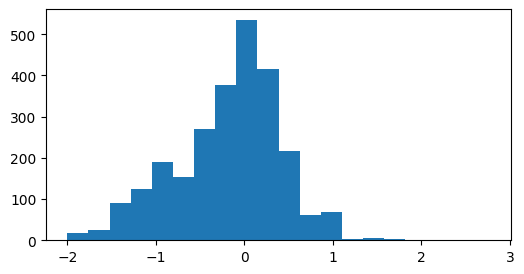

In [33]:
predict_mean['Escore'] = predict_mean['Escore'] + predict_mean['hazard_pdt'] + predict_mean['green_pdt'] +  predict_mean['patent'] 
predict_mean['Gscore'] = predict_mean['Gscore'] + predict_mean['major_50'] +  predict_mean['adt_bad']

predict_mean['TotalScore'] = predict_mean['Escore'] + predict_mean['Sscore'] + predict_mean['Gscore']
plt.figure(figsize=(6,3))
plt.hist(predict_mean['TotalScore'], bins = 20);

In [34]:
predict_mean.drop(['major_50', 'adt_bad', 'hazard_pdt', 'green_pdt', 'patent'], axis=1).describe()

,CmpID,Year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,TotalScore
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,682.959703,2020.501565,0.065702,0.651032,1.022121,0.121064,0.025022,0.030382,-0.237580,-0.182176
std,398.661749,0.500095,0.346592,0.460185,0.636152,0.452002,0.150520,0.143884,0.518828,0.601475
min,1.000000,2020.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-2.000000,-2.000000
25%,334.750000,2020.000000,0.000000,0.421053,0.882003,-0.200000,0.000000,-0.045218,-0.484315,-0.514286
50%,683.500000,2021.000000,0.000000,0.613961,1.041667,0.103652,0.000000,0.016190,-0.100000,-0.078947
75%,1025.000000,2021.000000,0.000000,0.828571,1.186875,0.430403,0.000000,0.100000,0.102039,0.222222
max,1382.000000,2021.000000,8.000000,8.428571,26.250000,1.000000,3.000000,1.000000,1.000000,2.774194


In [52]:
def get_ratio(score, start=float, end=float):
    cnt = score[(score > start) & (score <= end)]
    print(f"{start}초과 {end}이하 : {len(cnt) / len(score) * 100:.2f}%")

In [421]:
predict_mean.drop(['major_50', 'adt_bad', 'adt_bad', 'hazard_pdt', 'green_pdt', 'patent'], axis=1, inplace=True)
predict_mean.to_excel('predict_mean2.xlsx')

In [411]:
# 방안 2) 
predict_extra = pd.merge(predict_sum, extra, on=['id','year'], how='left')
predict_extra.fillna(0, inplace=True)
predict_extra

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,major_50,adt_bad,hazard_pdt,green_pdt,patent
0,1,2020,1,5,9,10,0.5,-0.071429,-1.428571,0.0,0.0,0.0,0.0,0.0
1,1,2021,0,12,12,2,0.0,-2.000000,-1.000000,-1.0,0.0,0.0,0.0,0.0
2,2,2020,3,10,12,7,0.0,-0.750000,0.750000,0.0,0.0,0.0,0.0,0.0
3,2,2021,0,4,10,9,0.0,-1.000000,3.000000,0.0,0.0,0.0,0.0,0.0
4,3,2020,0,11,26,13,0.0,3.666667,7.333333,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,0.0,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0
2552,1381,2020,0,1,3,3,0.0,0.500000,2.500000,0.0,0.0,0.0,0.0,0.0
2553,1381,2021,0,3,2,0,0.0,0.166667,-0.166667,0.0,0.0,0.0,0.0,0.0
2554,1382,2020,0,1,6,0,0.0,0.500000,-0.500000,0.0,0.0,0.0,0.0,0.0


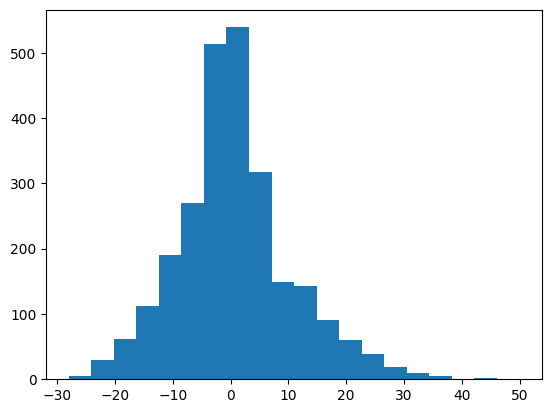

In [412]:
predict_extra['Escore'] = predict_extra['Escore'] + predict_extra['hazard_pdt'] + predict_extra['green_pdt'] +  predict_extra['patent']
predict_extra['Gscore'] = predict_extra['Gscore'] + predict_extra['major_50'] +  predict_extra['adt_bad']

predict_extra['TotalScore'] = predict_extra['Escore'] + predict_extra['Sscore'] + predict_extra['Gscore']
plt.hist(predict_extra['TotalScore'], bins = 20);

## 4. 데이터셋 스케일링

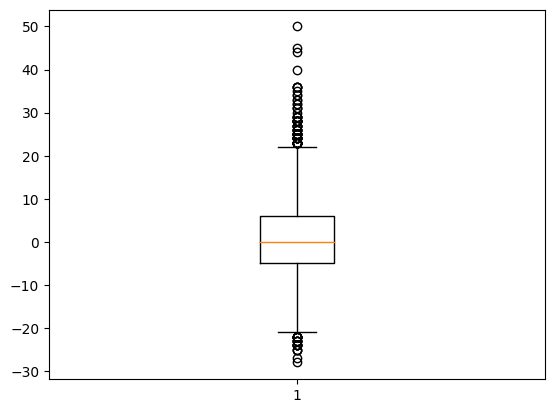

In [297]:
plt.boxplot(predict_extra['TotalScore']);

In [306]:
# 방안 1)기업별 문서수의 영향력을 줄이기 위해 ESG 통합점수를 ln(기업 및 연도별 문서수)+1로 나누기
for idx in range(len(predict_extra)):
    predict_extra.loc[idx, 'TotalScore1'] = predict_extra.loc[idx, 'TotalScore'] / (np.log(len(predict.id[predict.id == predict_extra.id[idx]]))+1)
predict_extra

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,major_50,adt_bad,hazard_pdt,green_pdt,patent,TotalScore,TotalScore1
0,1,2020,1,5,9,10,0.5,-0.071429,-1.428571,0.0,0.0,0.0,0.0,0.0,-1.000000e+00,-2.239273e-01
1,1,2021,0,12,12,2,0.0,-2.000000,-2.000000,-1.0,0.0,0.0,0.0,0.0,-4.000000e+00,-8.957090e-01
2,2,2020,3,10,12,7,0.0,-0.750000,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00
3,2,2021,0,4,10,9,0.0,-1.000000,3.000000,0.0,0.0,0.0,0.0,0.0,2.000000e+00,4.141952e-01
4,3,2020,0,11,26,13,0.0,3.666667,7.333333,0.0,0.0,0.0,0.0,0.0,1.100000e+01,2.299240e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,0.0,0.000000,-1.000000,0.0,0.0,0.0,0.0,0.0,-1.000000e+00,-5.906161e-01
2552,1381,2020,0,1,3,3,0.0,0.500000,2.500000,0.0,0.0,0.0,0.0,0.0,3.000000e+00,1.149673e+00
2553,1381,2021,0,3,2,0,0.0,0.166667,-0.166667,0.0,0.0,0.0,0.0,0.0,-5.551115e-17,-2.127322e-17
2554,1382,2020,0,1,6,0,0.0,0.500000,-0.500000,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00


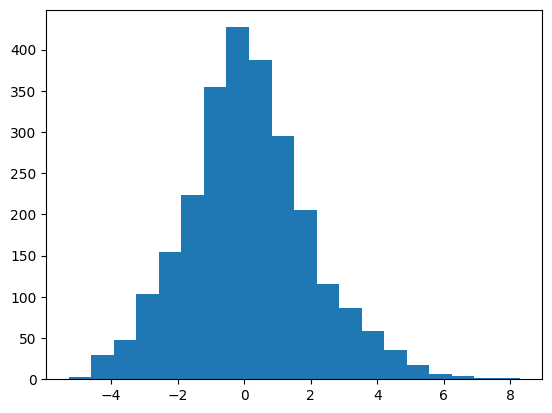

In [307]:
predict_extra.drop(['major_50', 'adt_bad', 'adt_bad', 'hazard_pdt', 'green_pdt', 'patent'], axis=1, inplace=True)
plt.hist(predict_extra['TotalScore1'], bins = 20);

In [332]:
print(get_ratio(predict_extra['TotalScore1'], 9, 10))
print(get_ratio(predict_extra['TotalScore1'], 6, 9))
print(get_ratio(predict_extra['TotalScore1'], 3, 6))
print(get_ratio(predict_extra['TotalScore1'], 0, 3))
print(get_ratio(predict_extra['TotalScore1'], -3, 0))
print(get_ratio(predict_extra['TotalScore1'], -5, -3))

9초과 10이하 : 0.00%
None
6초과 9이하 : 0.43%
None
3초과 6이하 : 6.85%
None
0초과 3이하 : 41.31%
None
-3초과 0이하 : 46.71%
None
-5초과 -3이하 : 4.62%
None


In [308]:
# 방안 2)표준화
scaler = StandardScaler()
predict_extra['TotalScore2'] = scaler.fit_transform(predict_extra[['TotalScore']])
predict_extra.drop(['major_50', 'adt_bad', 'hazard_pdt', 'green_pdt', 'patent'], axis=1, inplace=True)
predict_extra

,id,year,Ecnt,Scnt,Gcnt,predicted,Escore,Sscore,Gscore,TotalScore,TotalScore1,TotalScore2
0,1,2020,1,5,9,10,0.5,-0.071429,-1.428571,-1.000000e+00,-2.239273e-01,-0.178508
1,1,2021,0,12,12,2,0.0,-2.000000,-2.000000,-4.000000e+00,-8.957090e-01,-0.481675
2,2,2020,3,10,12,7,0.0,-0.750000,0.750000,0.000000e+00,0.000000e+00,-0.077452
3,2,2021,0,4,10,9,0.0,-1.000000,3.000000,2.000000e+00,4.141952e-01,0.124659
4,3,2020,0,11,26,13,0.0,3.666667,7.333333,1.100000e+01,2.299240e+00,1.034160
...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1380,2021,0,0,1,0,0.0,0.000000,-1.000000,-1.000000e+00,-5.906161e-01,-0.178508
2552,1381,2020,0,1,3,3,0.0,0.500000,2.500000,3.000000e+00,1.149673e+00,0.225715
2553,1381,2021,0,3,2,0,0.0,0.166667,-0.166667,-5.551115e-17,-2.127322e-17,-0.077452
2554,1382,2020,0,1,6,0,0.0,0.500000,-0.500000,0.000000e+00,0.000000e+00,-0.077452


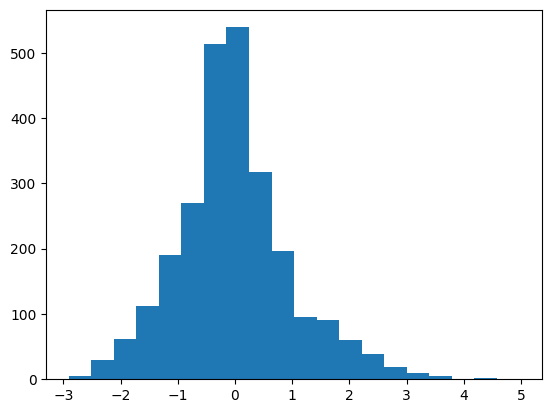

In [309]:
plt.hist(predict_extra['TotalScore2'], bins = 20);

In [333]:
print(get_ratio(predict_extra['TotalScore2'], 4.5, 6))
print(get_ratio(predict_extra['TotalScore2'], 3, 4.5))
print(get_ratio(predict_extra['TotalScore2'], 1.5, 3))
print(get_ratio(predict_extra['TotalScore2'], 0, 1.5))
print(get_ratio(predict_extra['TotalScore2'], -1.5, 0))
print(get_ratio(predict_extra['TotalScore2'], -5, -1.5))

4.5초과 6이하 : 0.04%
None
3초과 4.5이하 : 0.67%
None
1.5초과 3이하 : 7.00%
None
0초과 1.5이하 : 39.75%
None
-1.5초과 0이하 : 46.67%
None
-5초과 -1.5이하 : 5.87%
None


## 5. 점수 구간별 등급화

In [ ]:
# predict_extra = pd.read_excel('predict_nf.xlsx')
# predict_extra.describe()

In [228]:
scaler = MinMaxScaler()
predict_extra['Egrade'] = scaler.fit_transform(predict_extra[['Escore']])
predict_extra['Sgrade'] = scaler.fit_transform(predict_extra[['Sscore']])
predict_extra['Ggrade'] = scaler.fit_transform(predict_extra[['Gscore']])

In [229]:
label = ['D', 'C', 'B',  'A', 'S']
bin1 = [-10, -1, 0, 1, 2, 10]
bin2 = [-10, -0.5, 0, 1, 5, 10]
predict_extra['TotalGrade'] = pd.cut(predict_extra['TotalScore'], bin1, right=True, labels=label)
predict_extra['Egrade'] = pd.cut(predict_extra['Escore'], bin2, right=True, labels=label)
predict_extra['Sgrade'] = pd.cut(predict_extra['Sscore'], bin2, right=True, labels=label)
predict_extra['Ggrade'] = pd.cut(predict_extra['Gscore'], bin2, right=True, labels=label)

print(predict_extra['TotalGrade'].value_counts())
print(predict_extra['Egrade'].value_counts())
print(predict_extra['Sgrade'].value_counts())
print(predict_extra['Ggrade'].value_counts())

C    1133
B     951
D     460
A      12
S       0
Name: TotalGrade, dtype: int64
C    2000
B     540
A      12
D       4
S       0
Name: Egrade, dtype: int64
B    1345
C    1197
D      13
A       1
S       0
Name: Sgrade, dtype: int64
C    933
B    877
D    746
A      0
S      0
Name: Ggrade, dtype: int64


In [239]:
predict_extra['TotalRanking'] = predict_extra['TotalScore'].rank(method='dense', ascending=False) / len(predict_extra) * 100

industry = industry[['CmpID', 'ind_code']]
predict_industry = pd.merge(predict_extra, industry, on='CmpID', how='left')
predict_industry['IndRanking'] = predict_industry.groupby('ind_code')['TotalScore'].rank(method='dense', ascending=False) / len(predict_extra) * 100
predict_industry.drop('ind_code', axis=1, inplace=True)

In [240]:
predict_industry=predict_industry[['CmpID','Year', 'Ecnt', 'Scnt', 'Gcnt', 'TonePolarity', 'Escore', 'Sscore', 'Gscore',
                                   'TotalScore', 'Egrade', 'Sgrade', 'Ggrade', 'TotalGrade', 'TotalRanking', 'IndRanking']]
pd.options.display.float_format = '{:.3f}'.format
predict_industry

,CmpID,Year,Ecnt,Scnt,Gcnt,TonePolarity,Escore,Sscore,Gscore,TotalScore,Egrade,Sgrade,Ggrade,TotalGrade,TotalRanking,IndRanking
0,1,2020,0.062,0.312,0.562,0.625,0.031,-0.004,-0.089,-0.062,B,C,C,C,19.465,14.001
1,1,2021,0.000,0.750,0.750,0.125,0.000,-0.125,-1.062,-1.188,C,C,D,D,36.179,26.881
2,2,2020,0.120,0.400,0.480,0.280,0.000,-0.030,0.030,0.000,C,C,B,C,16.643,11.505
3,2,2021,0.000,0.190,0.476,0.429,0.000,-0.048,0.143,0.095,C,C,B,B,12.988,8.900
4,3,2020,0.000,0.478,1.130,0.565,0.000,0.159,0.319,0.478,C,B,B,B,3.907,2.641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2759,1380,2021,0.000,0.368,1.000,0.000,0.000,0.079,-1.105,-1.026,C,B,D,D,34.334,0.904
2760,1381,2020,0.000,0.333,1.000,1.000,0.000,0.167,0.833,1.000,C,B,B,B,0.326,0.036
2761,1381,2021,0.000,1.500,1.000,0.000,0.000,0.083,-0.083,-0.000,C,B,C,C,16.860,0.362
2762,1382,2020,0.000,0.250,1.500,0.000,0.000,0.125,-0.125,0.000,C,B,C,C,16.643,11.505


In [280]:
print(get_ratio(predict['TotalScore'], 2, 10))
print(get_ratio(predict['TotalScore'], 1, 2))
print(get_ratio(predict['TotalScore'], 0, 1))
print(get_ratio(predict['TotalScore'], -1, 0))
print(get_ratio(predict['TotalScore'], -5, -1))

2초과 10이하 : 0.00%
None
1초과 2이하 : 0.43%
None
0초과 1이하 : 34.41%
None
-1초과 0이하 : 40.99%
None
-5초과 -1이하 : 16.64%
None


In [263]:
predict_industry['Egrade'][predict_industry['Year'] == 2021].value_counts().sort_index(ascending=False)

S      0
A      8
B    302
C    970
D      2
Name: Egrade, dtype: int64

In [264]:
predict_industry['Sgrade'][predict_industry['Year'] == 2021].value_counts().sort_index(ascending=False)

S      0
A      0
B    694
C    581
D      7
Name: Sgrade, dtype: int64

In [269]:
predict_industry['TotalGrade'].value_counts().sort_index(ascending=False)

S       0
A      12
B     951
C    1133
D     460
Name: TotalGrade, dtype: int64

In [282]:
predict['TotalGrade'][predict['Year'] == 2021].value_counts().sort_index()

A       7
B     489
C     560
D     226
NF    100
Name: TotalGrade, dtype: int64

In [21]:
predict['TotalGrade'][predict['Year'] == 2020].value_counts().sort_index()

A       5
B     462
C     573
D     234
NF    108
Name: TotalGrade, dtype: int64

In [23]:
predict['TotalGrade'].value_counts('Year')

C     0.409913
B     0.344067
D     0.166425
NF    0.075253
A     0.004342
Name: TotalGrade, dtype: float64

In [17]:
predict.groupby('TotalGrade').count()

,CmpID,회사명,Year,Ecnt,Scnt,Gcnt,TonePolarity,Escore,Sscore,Gscore,TotalScore,Egrade,Sgrade,Ggrade,TotalRanking,IndRanking
TotalGrade,,,,,,,,,,,,,,,,
A,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
B,951,951,951,951,951,951,951,951,951,951,951,951,951,951,951,951
C,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133,1133
D,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460,460
NF,208,208,208,0,0,0,0,0,0,0,0,208,208,208,0,0


In [301]:
predict['Ggrade'].value_counts().sort_index()

B     877
C     933
D     746
NF    208
Name: Ggrade, dtype: int64

In [46]:
print(predict['Ggrade'][predict['Year'] == 2020].value_counts().sort_index())
print(predict['Ggrade'][predict['Year'] == 2021].value_counts().sort_index())

B     433
C     464
D     377
NF    108
Name: Ggrade, dtype: int64
B     444
C     469
D     369
NF    100
Name: Ggrade, dtype: int64


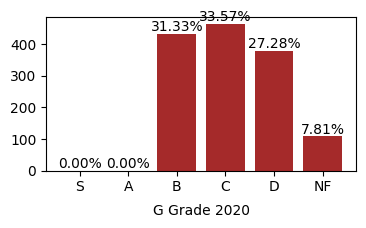

In [47]:
X = [0, 0, 433, 464, 377, 108]
x =[f'{i/1382*100:.2f}%' for i in X]
label = ['S', 'A', 'B', 'C', 'D', 'NF']
fig, ax = plt.subplots(figsize=(4, 2))
plot = ax.bar(label, X, color='brown')
ax.bar_label(plot, x)
plt.xlabel("G Grade 2020", labelpad=7);

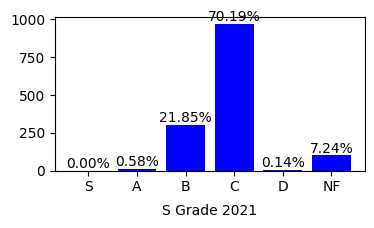

In [49]:
X = [0, 8, 302, 970, 2, 100] 
x =[f'{i/1382*100:.2f}%' for i in X]
label = ['S', 'A', 'B', 'C', 'D', 'NF']
fig, ax = plt.subplots(figsize=(4, 2))
plot = ax.bar(label, X, color='b')
ax.bar_label(plot, x)
plt.xlabel("S Grade 2021", labelpad=7);

In [307]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CmpID         2764 non-null   int64  
 1   회사명           2764 non-null   object 
 2   Year          2764 non-null   int64  
 3   Ecnt          2556 non-null   float64
 4   Scnt          2556 non-null   float64
 5   Gcnt          2556 non-null   float64
 6   TonePolarity  2556 non-null   float64
 7   Escore        2556 non-null   float64
 8   Sscore        2556 non-null   float64
 9   Gscore        2556 non-null   float64
 10  TotalScore    2556 non-null   float64
 11  Egrade        2764 non-null   object 
 12  Sgrade        2764 non-null   object 
 13  Ggrade        2764 non-null   object 
 14  TotalGrade    2764 non-null   object 
 15  TotalRanking  2556 non-null   float64
 16  IndRanking    2556 non-null   float64
dtypes: float64(10), int64(2), object(5)
memory usage: 367.2+ KB


In [76]:
predict_industry.to_excel('predict_industry1.xlsx')

## 6. 점수 없는 기업은 NF 등급 부여

In [68]:
company = company[['CmpID', '회사명']]
company = pd.concat([company, company], ignore_index=True)
year = [2020] * 1382 + [2021] * 1382 
company['Year'] = year

In [75]:
company = company.sort_values('CmpID')
company.reset_index(inplace=True, drop=True)

In [94]:
predict_nf = pd.merge(company, predict_industry, on=['CmpID', 'Year'], how='left')
predict_nf['TotalGrade'][predict_nf['TotalGrade'].isna() == True] = 'NF'
predict_nf['Egrade'][predict_nf['Egrade'].isna() == True] = 'NF'
predict_nf['Sgrade'][predict_nf['Sgrade'].isna() == True] = 'NF'
predict_nf['Ggrade'][predict_nf['Ggrade'].isna() == True] = 'NF'

C:\Users\hanah\AppData\Local\Temp\ipykernel_11288\3441706956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_nf['TotalGrade'][predict_nf['TotalGrade'].isna() == True] = 'NF'
C:\Users\hanah\AppData\Local\Temp\ipykernel_11288\3441706956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_nf['Egrade'][predict_nf['Egrade'].isna() == True] = 'NF'
C:\Users\hanah\AppData\Local\Temp\ipykernel_11288\3441706956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [97]:
predict_nf.to_excel('predict_nf.xlsx')